# <u> Project 2 (Asset Allocation Exercise) </u> 

Used the same method with the csvs and excel sheets as in exercise 1.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import os
import csv
import seaborn as sns
import scipy.optimize as sco
import numpy as np
from datetime import datetime
import matplotlib.ticker as ticker
import importlib
import module
import module as m   #this is a custom made module with functions used for the optimsation of the portfolio

## part a) Retrieve data

In [2]:
df = pd.read_excel(r'Internship_Project_2.xlsx', sheet_name='Sheet1')
GFD_tickers =  df['GFD ticker'].tolist()

In [3]:
with open('ticker_symbols.csv', mode='w', newline='') as file: #creates csv with ticker symbol on new line.
    writer = csv.writer(file)
    for item in GFD_tickers:
        writer.writerow([item])  

I used this is get the GFD data into an excel file
## Creating DataFrame

In [4]:
time_series_data  = pd.read_excel('excel_sheets/Tim_Bonner_Project_2_20241023062267.xlsx', sheet_name=None)  #extract time series data from GFD excel sheet
combined_data = m.combined_data_ts_excel(time_series_data)  #merge sheets of excel

In [5]:
ticker_dict = m.create_ts_dictionary(combined_data) #convert into {'ticker': time_series_df} format
print(ticker_dict.keys())

dict_keys(['ABL_D', 'AUDUSD', 'BRLUSD', 'BRT_D', 'CADUSD', 'CHFUSD', 'CMALSD', 'CMAPPLEM', 'CMBEEFM', 'CMCOALM', 'CMCORNM', 'CMCOTUSM', 'CMEGGSM', 'CMIRONOM', 'CMKCMAND', 'CMNISD', 'CMPALMM', 'CMPBSD', 'CMSTLHRCD', 'CMWNGEM', 'EURGBP', 'EURUSD', 'GBPUSD', 'HO_USGD', 'IMUSABCD', 'JPYUSD', 'MXNUSD', 'NZDUSD', 'TRAUTGVM', 'TRBRABIM', 'TRCANBIM', 'TRCANGVM', 'TRDEUGVM', 'TREUROBM', 'TRFRAGVM', 'TRGBRBIM', 'TRGBRGVM', 'TRJPNGVM', 'TRKORGVM', 'TRUSABID', 'TRUSG10M', 'TRUSG2M', 'TRUSG30M', 'TRUSG5M', 'USDBRL', 'XAUFIXAD', 'XPD_D', '_AAXGRD', '_AORDAD', '_BSESND', '_BVSPD', '_CACTD', '_CDAXP', '_DJTTRD', '_DMIEA0D', '_DMIEF0D', '_FTASD', '_FTFSTAD', '_HSIDVD', '_ICXD', '_IDXD', '_IHXD', '_KS11D', '_N225D', '_NIFTRID', '_OMXSBGI', '_RUTD', '_SMSID', '_SPXTRD', '_SSEAD', '_SSHID', '_STOXXER', '_SU1599D', '_TFTASD', '_TFTFBMD', '_TFTFTSD', '_TFTMIBD', '_TOPXDVD', '_TRGSPTSE', '_TWIID', '_VIXD', '_WIGD', '__BOC1_D', '__CC1_ID', '__CCC1_D', '__CTC1_D', '__CU_NYD', '__C_US2D', '__KCC1_D', '__MZN2MD'

When the time series is extracted, it gets reordered alphabetically. This step restores the original order from the Excel sheet.

In [6]:
reordered_ticker_dict = m.reorder_ticker_dict(ticker_dict, GFD_tickers)

## part b) Find the average annual return from beginnning until 1984

In [7]:
average_annual_returns_pre_1984 = m.average_return_pre_1984(reordered_ticker_dict)

for ticker, avg_return in average_annual_returns_pre_1984.items():
    print(f'Ticker: {ticker}, Average Annual Return (pre-1984): {avg_return:.2%}')


Ticker: __C_US2D, Average Annual Return (pre-1984): 6.74%
Ticker: __SYM_4D, Average Annual Return (pre-1984): 5.67%
Ticker: __SYB_TD, Average Annual Return (pre-1984): 5.52%
Ticker: CMAPPLEM, Average Annual Return (pre-1984): 7.25%
Ticker: __BOC1_D, Average Annual Return (pre-1984): 7.72%
Ticker: __CC1_ID, Average Annual Return (pre-1984): 6.16%
Ticker: __WC1_ID, Average Annual Return (pre-1984): 4.65%
Ticker: _SU1599D, Average Annual Return (pre-1984): 3.88%
Ticker: __CCC1_D, Average Annual Return (pre-1984): 11.60%
Ticker: __CTC1_D, Average Annual Return (pre-1984): 6.56%
Ticker: CMEGGSM, Average Annual Return (pre-1984): 4.56%
Ticker: CMCORNM, Average Annual Return (pre-1984): 7.00%
Ticker: CMKCMAND, Average Annual Return (pre-1984): 5.88%
Ticker: CMBEEFM, Average Annual Return (pre-1984): 7.07%
Ticker: __KCC1_D, Average Annual Return (pre-1984): 7.34%
Ticker: CMPALMM, Average Annual Return (pre-1984): 3.10%
Ticker: __W_USSD, Average Annual Return (pre-1984): 5.10%
Ticker: _ICXD, Av

All the percentage changes seem reasonable except for 1: TRDEUGVM (10-year German Bond) which has an average of 14177694566.28%.




## part c) Covairance Matrix after >1984


In [8]:
cov_matrix, corr_matrix, yearly_percentage_returns_post_1984, average_annual_returns_post_1984 = m.generate_covariance_matrix(reordered_ticker_dict, datetime.now().year)

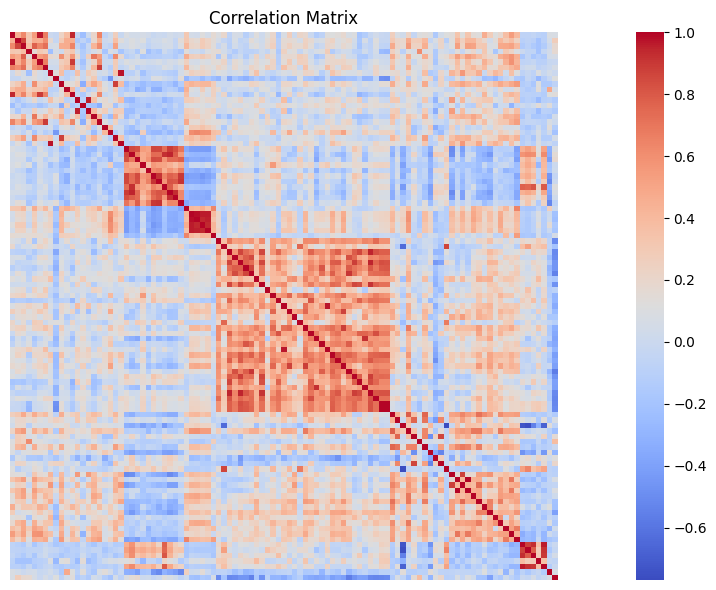

In [9]:
fig, ax = plt.subplots(figsize=(16, 6))
sns.heatmap(corr_matrix, cmap='coolwarm', cbar=True, ax=ax, annot=False, xticklabels=False, yticklabels=False, square=True)
ax.set_title('Correlation Matrix')

plt.tight_layout()
plt.show()


I plot the correlation matrix since the covariance matrix is skewed by large values. 

The covariance matrix is saved in an excel file 'covariance_matrix.xlsx'

In [10]:
cov_matrix.to_excel('covariance_matrix.xlsx')

## Part d) (Markowitz mean-variance efficient frontier)
## New Yearly Returns for > 1984

In [11]:
for ticker, avg_return in average_annual_returns_post_1984.items():
    print(f'{ticker} - Average Annual Return (>=1984): {avg_return:.2%}')

__C_US2D - Average Annual Return (>=1984): 4.38%
__SYM_4D - Average Annual Return (>=1984): 4.71%
__SYB_TD - Average Annual Return (>=1984): 3.65%
CMAPPLEM - Average Annual Return (>=1984): 7.98%
__BOC1_D - Average Annual Return (>=1984): 4.06%
__CC1_ID - Average Annual Return (>=1984): 4.46%
__WC1_ID - Average Annual Return (>=1984): 4.09%
_SU1599D - Average Annual Return (>=1984): 8.60%
__CCC1_D - Average Annual Return (>=1984): 4.12%
__CTC1_D - Average Annual Return (>=1984): 3.46%
CMEGGSM - Average Annual Return (>=1984): 6.22%
CMCORNM - Average Annual Return (>=1984): 3.25%
CMKCMAND - Average Annual Return (>=1984): 6.15%
CMBEEFM - Average Annual Return (>=1984): 0.84%
__KCC1_D - Average Annual Return (>=1984): 7.24%
CMPALMM - Average Annual Return (>=1984): 4.22%
__W_USSD - Average Annual Return (>=1984): 4.46%
_ICXD - Average Annual Return (>=1984): 3.84%
_IHXD - Average Annual Return (>=1984): 3.19%
CMCOTUSM - Average Annual Return (>=1984): 2.98%
__SBC1_D - Average Annual Retu

All of these values seem semi resonable except TRBRABIM which has a percentage change of 27685585.28%.

$$
\min_{\mathbf{w}} \quad \mathbf{w}^\top \mathbf{\Sigma} \mathbf{w} \quad \text{subject to} \quad \mathbf{w}^\top \mathbf{1} = 1 \quad \text{and} \quad \mathbf{w}^\top \mathbf{E}[R] = E[R_p]
$$





Since some of the average returns can exceptionally large like above, these values can massively distort the theory and hence I regard 98th percentile and above.

In [12]:
expected_returns = np.array(list(average_annual_returns_post_1984.values())) #convert dictionary of returns into a list
returns_df = pd.DataFrame(yearly_percentage_returns_post_1984)
#cov_matrix = returns_df.cov().values

In [13]:
upper_percentile = np.percentile(expected_returns, 98)  # Used to filter out extreme values which are  unlikely to be long-term changes 
valid_indices = (expected_returns <= upper_percentile)

filtered_expected_returns = expected_returns[valid_indices]    #Filter out 98th percentile and above

cov_matrix_np = cov_matrix.to_numpy() if isinstance(cov_matrix, pd.DataFrame) else cov_matrix  # Ensure cov_matrix is a NumPy array
filtered_cov_matrix = cov_matrix_np[np.ix_(valid_indices, valid_indices)]

n_assets = len(filtered_expected_returns)  
initial_guess = np.ones(n_assets) / n_assets  # Start with equally weighted portfolio
bounds = tuple((0, 0.1) for _ in range(n_assets))  # Max weight of 10% for each asset + no shorting 

target_returns = np.linspace(filtered_expected_returns.min(), filtered_expected_returns.max(), 100)  # Use filtered returns

In [14]:
efficient_return, efficient_risk, efficient_weights = m.find_efficient_frontier(target_returns, filtered_expected_returns, filtered_cov_matrix, bounds, initial_guess, len(expected_returns), valid_indices)

The sum of the weights is 1.0000000000000004


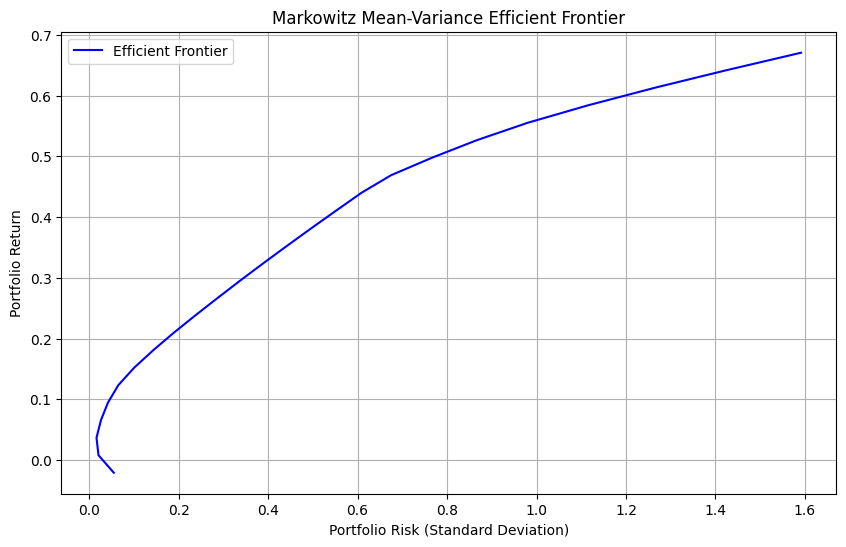

In [15]:
plt.figure(figsize=(10, 6))
plt.plot(efficient_risk, efficient_return, label='Efficient Frontier', color='b')
print(f"The sum of the weights is {sum(efficient_weights[0])}")
plt.title('Markowitz Mean-Variance Efficient Frontier')
plt.xlabel('Portfolio Risk (Standard Deviation)')
plt.ylabel('Portfolio Return')
plt.legend()
plt.grid(True)

plt.show()

This gives the efficeint frontier. In order to find the optimal holdings, there are a couple of possible approaches:

- Tangency Porfolio (highest SR)
- Minimum Risk Portfolio


In [16]:
risk_free_rate = 0.0 
tangent_weights, tangent_return, tangent_risk, sharpe_ratio = m.find_tangent_portfolio(filtered_expected_returns, filtered_cov_matrix, risk_free_rate, initial_guess, bounds, len(expected_returns), valid_indices)

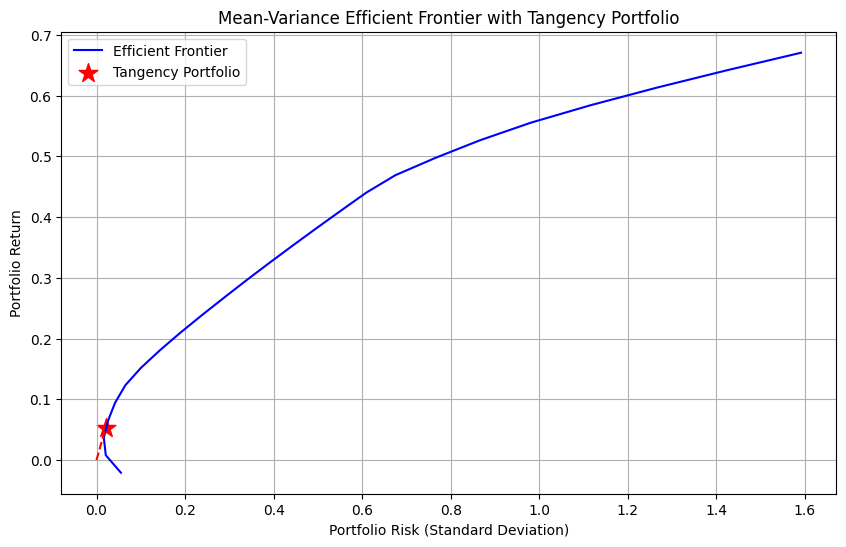

CMAPPLEM: 0.0097
__CCC1_D: 0.0572
_IHXD: 0.0216
TRGBRGVM: 0.1000
TRKORGVM: 0.0605
TRDEUGVM: 0.0212
TRUSG30M: 0.0533
ABL_D: 0.0052
CMWNGEM: 0.0085
_TFTFTSD: 0.0040
_IDXD: 0.0507
__OTC__D: 0.0382
_SSHID: 0.0122
EURGBP: 0.0387
CHFUSD: 0.1000
__XAU_BD: 0.0324
__PL_NYD: 0.0058
TRCANBIM: 0.0177
TREUROBM: 0.1000
TRUSABID: 0.1000
TRGBRBIM: 0.1000
_VIXD: 0.0378

Tangency Portfolio Expected Return: 0.0527
Tangency Portfolio Risk (Standard Deviation): 0.0206
Tangency Portfolio Sharpe Ratio: 2.5629


In [17]:
plt.figure(figsize=(10, 6))
plt.plot(efficient_risk, efficient_return, label='Efficient Frontier', color='b')

plt.scatter(tangent_risk, tangent_return, marker='*', color='r', s=200, label='Tangency Portfolio')

plt.title('Mean-Variance Efficient Frontier with Tangency Portfolio')
plt.xlabel('Portfolio Risk (Standard Deviation)')
plt.ylabel('Portfolio Return')
plt.legend()
plt.grid(True)
plt.plot([0, tangent_risk], [0, tangent_return], 'r--')  #tangent line
plt.show()

#Weights of the tangent portfolio and their corresponding ticker
for i, ticker in enumerate(np.array(list(average_annual_returns_post_1984.keys()))[valid_indices]):
    if round(tangent_weights[i], 4) != 0:  # Check if rounded to 4 decimal places, it's not 0 (some holdings are very small)
        print(f"{ticker}: {tangent_weights[i]:.4f}")

print(f"\nTangency Portfolio Expected Return: {tangent_return:.4f}")
print(f"Tangency Portfolio Risk (Standard Deviation): {tangent_risk:.4f}")
print(f"Tangency Portfolio Sharpe Ratio: {sharpe_ratio:.4f}")




## part e) Cumulative Performance

I tried to make this work consistently for the expanding window method but often I can't find a solution to the tangency solution. 

Hence, I try to look for the tangency solution and if I can't find it I find the new efficient portfolio and choose the one with the smallest risk.

In [18]:
over_all_time_percentage_change = yearly_percentage_returns_post_1984

start_year = 1985
end_year = 2023
risk_free_rate = 0.0
capital = 1000000  # Initial capital, e.g., $1 Million

# Running the function with arguments
years, cumulative_performance = m.process_yearly_portfolio_performance(
    start_year=start_year,
    end_year=end_year,
    risk_free_rate=risk_free_rate,
    initial_guess=initial_guess,
    bounds=bounds,
    reordered_ticker_dict=reordered_ticker_dict,
    over_all_time_percentage_change=over_all_time_percentage_change,
    capital=capital
)

Processing year 1985...
Using minimum variance portfolio as fallback.
Processing year 1986...


c:\Users\timbo\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\core\frame.py:11211: RuntimeWarning: Degrees of freedom <= 0 for slice
  base_cov = np.cov(mat.T, ddof=ddof)
c:\Users\timbo\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\timbo\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


Using minimum variance portfolio as fallback.
Year 1987 completed. Portfolio return: 4.80%, Capital: $1,048,002.41
Processing year 1987...
Using minimum variance portfolio as fallback.
Year 1988 completed. Portfolio return: 31.05%, Capital: $1,373,395.48
Processing year 1988...
Using minimum variance portfolio as fallback.
Year 1989 completed. Portfolio return: 92.29%, Capital: $2,640,951.71
Processing year 1989...
Using minimum variance portfolio as fallback.
Year 1990 completed. Portfolio return: 43.49%, Capital: $3,789,389.63
Processing year 1990...
Using minimum variance portfolio as fallback.
Year 1991 completed. Portfolio return: -3.46%, Capital: $3,658,165.00
Processing year 1991...
Using minimum variance portfolio as fallback.
Year 1992 completed. Portfolio return: 6.16%, Capital: $3,883,573.44
Processing year 1992...
Using minimum variance portfolio as fallback.
Year 1993 completed. Portfolio return: 5.25%, Capital: $4,087,562.04
Processing year 1993...
Using minimum variance 

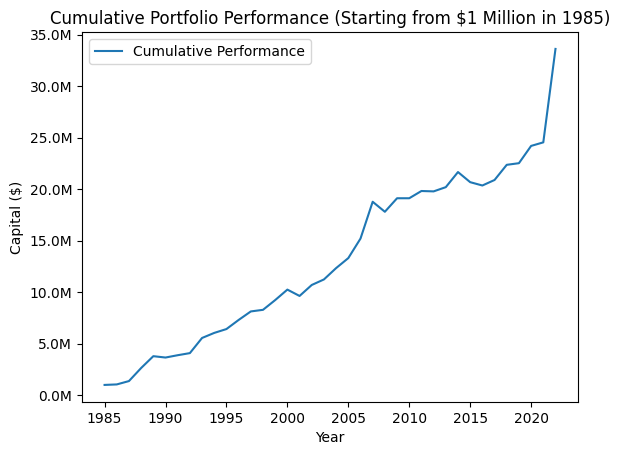

In [19]:
from matplotlib import ticker  #import again since there are issues with overiding

years = list(range(1985, 2023))  # Start in 1985 since we first invest in that year
plt.plot(years, cumulative_performance, label="Cumulative Performance")
plt.xlabel("Year")
plt.ylabel("Capital ($)")
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{x/1e6:.1f}M'))
plt.title("Cumulative Portfolio Performance (Starting from $1 Million in 1985)")
plt.legend()
plt.show()
